# Decision Trees and Random Forests Classificator Models

Autor: Renan Luiz Andrade Vital 
email: vitalrenan@icloud.com    
tel: +5513 9913.42600  
Certificação MTA 98-381

    This is a machine learning model created with educational purposes. 
    
    This random treaes ML model predicts of a borrower will pay back the loan in full. The was extracted from
    LendingClub.com (platform that connects people who need money with people who have money (investors).


    The data is public and can be downloaded on "https://www.lendingclub.com/info/download-data.action"
    
    Here are what the columns represent:
    * credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    * purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
    * int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    * installment: The monthly installments owed by the borrower if the loan is funded.
    * log.annual.inc: The natural log of the self-reported annual income of the borrower.
    * dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
    * fico: The FICO credit score of the borrower.
    * days.with.cr.line: The number of days the borrower has had a credit line.
    * revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
    * revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
    * inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
    * delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
    * pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#Importing the required libs for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the dataset
loans = pd.read_csv('loan_data.csv')

#Printing the dataframe
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
#Analysing the dataframe datatypes
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
#Analying the statistical profile of each feature
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<AxesSubplot:xlabel='purpose', ylabel='count'>

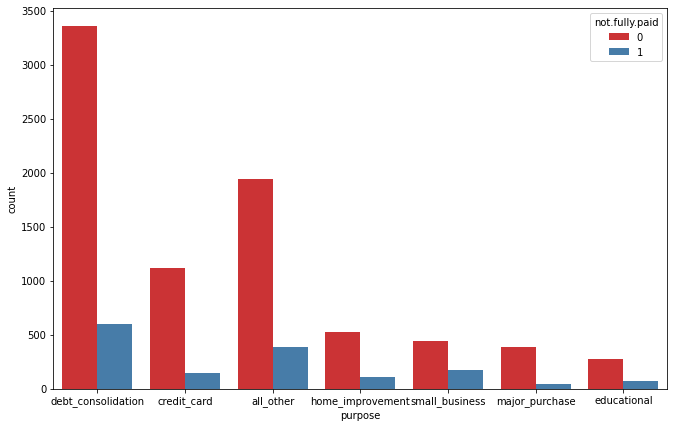

In [4]:
#Amount of loans by purpose and the fully paid status
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

There is a greater amount of loans for debt consolidation, however the parity full payment vs loan is almost the same for each purpose, except for small business, that is slightly higher than the other purposes.

Text(0.5, 0, 'Borrowers FICO Score')

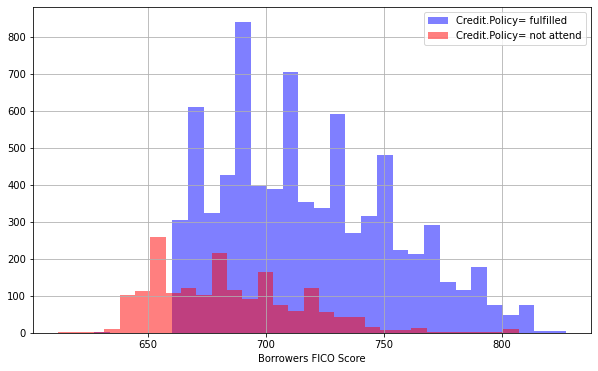

In [5]:
#histogram of FICO distributions for each credit.policy outcome

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Credit.Policy= fulfilled')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Credit.Policy= not attend')
plt.legend()
plt.xlabel('Borrowers FICO Score')

The figure reveals that below a certain FICO there are no borrowers with credit policy. And there is also a higher amount of users with credit policy.

Text(0.5, 0, 'Borrowers FICO Score')

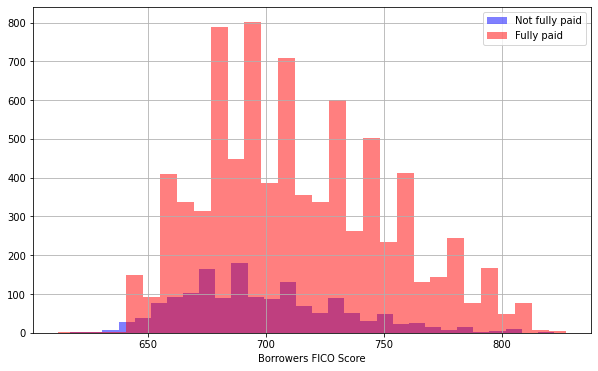

In [6]:
#Histogram of fico score by the full payment status

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Not fully paid')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Fully paid')
plt.legend()
plt.xlabel('Borrowers FICO Score')

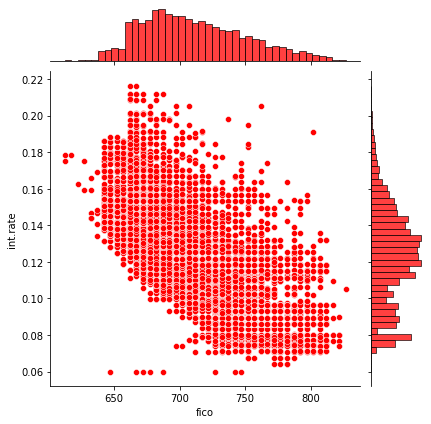

In [7]:
#Correlation between FICO Score and Interest Rate
sns.jointplot(x='fico',y='int.rate',data=loans,color='red')

<Figure size 792x504 with 0 Axes>

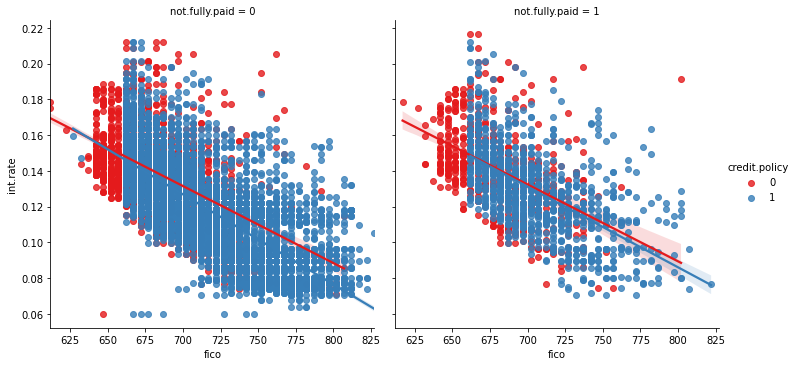

In [8]:
#Trend differed between not.fully.paid and credit.policy. 

plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1')

Analysing the two graphs above, the variables interest rate, fico, full payment and credit policy are correlated on a a regression line, but there is not a big difference between them.

In [9]:
#Transforming the Purpose column (with strings objects) into readable values for ML
purpose2 = ['purpose']

final_data = pd.get_dummies(loans,columns=purpose2,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [10]:
#Train test split

#Importing test split from skLearn
from sklearn.model_selection import train_test_split

#Selecting all columns except notfullypaid
X = final_data.drop('not.fully.paid',axis=1)
#Selecting not fully paid as target column
y = final_data['not.fully.paid']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Creating a Decision Tree model

In [11]:
#Importing Decision Tree module from SkLearn
from sklearn.tree import DecisionTreeClassifier

#instantiating the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
#Analysing the result with sklearn modules Report and confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



With decision tree model, the precision was fair in predicting full payments, however not enougth for predicting not fully paid loans.

In [13]:
print(confusion_matrix(y_test,predictions))

[[1993  438]
 [ 342  101]]


Random Forest Classifier

In [14]:
#Importing Random Forest model
from sklearn.ensemble import RandomForestClassifier

#Instantiating with 600 estimators
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.48      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [16]:
print(confusion_matrix(y_test,predictions))

[[2419   12]
 [ 432   11]]


Conclusion: The two models only performed fairly when predicting the fully paid results. However when predicting not fully paid loans, both were not consistent enough. The random forest model was sligthy better in recall and f1-score than the decision tree model, indicating that the random forest did not predicted false negatives. The "not fully paid" result has a fair precision, however a poor recall and f1-score. 